### 1. Read the dataset

Using pandas library to read the data

In [43]:
import pandas as pd

df = pd.read_csv("energydata_complete.csv")

### 2. Analyse and visualise the data

- Using `seaborn` and `matplotlib` for graph generation, and visualization of data distributions and trends.
- `NumPy` was use for numeric calculation

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### 2.1 Meta data

- date: Timestamp of the data entry.
- Appliances: Energy use of appliances in Wh.
- lights: Energy use of light fixtures in the house in Wh.
- T1 - T9: Temperature measurements in different rooms or areas of the house.
- RH_1 - RH_9: Humidity measurements in different rooms or areas of the house.
- T_out: Temperature outside (from Chievres weather station).
- Press_mm_hg: Pressure (from Chievres weather station) in mm Hg.
- RH_out: Humidity outside (from Chievres weather station) in %.
- Windspeed: Windspeed (from Chievres weather station) in m/s.
- Visibility: Visibility (from Chievres weather station) in km.
- Tdewpoint: Dew point temperature, which is a measure of atmospheric moisture. (from Chievres weather station) °C.
- rv1, rv2: Random value for comparison


In [28]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/01/2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/01/2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/01/2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11/01/2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11/01/2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


##### 2.2 Data Transformation for Visualization Analysis

- Transformed the `date` column into datetime format to standardize the data's format, enhancing the consistency and accuracy of subsequent analyses.
- Set the `date` column as the dataset's index to facilitate easier plotting and analysis of time series data.
- Defined `X` as the dataset excluding the `Appliances` column and `y` as solely the `Appliances` column to prepare for machine learning model training.
- Employed train-test split to partition the data into `X_train`, `X_test`, `y_train`, and `y_test`, with a test size of 20% and a `random_state` of 42, ensuring reproducibility.
- Created a DataFrame named "Appliances" using the `y_train` data for improve the presentation and interpretation.

**The reason of spllit the data in here**
- The data was split to prevent data leakage, ensuring that the analysis and visualization are conducted solely on the training set. This approach maintains the integrity and validity of the evaluation process.


In [40]:
from sklearn.model_selection import train_test_split

df["date"] = pd.to_datetime(df["date"],format='%d/%m/%Y %H:%M')
df.set_index('date', inplace=True)

X = df.drop(['Appliances'], axis=1)
y = df['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Appliances = pd.DataFrame({'Appliances': y_train})


##### 2.3 Visualization of Daily Energy Consumption by Appliances


- Utilized the "Appliances" DataFrame to calculate the daily total energy usage of appliances, summing up the energy consumption per day.
- Applied pandas' `plot()` function to generate the graph, displaying the daily energy usage with a blue line to represent the appliances.
- Enhanced graph readability by automatically formatting the x-axis dates using `matplotlib`'s `autofmt_xdate()` function.
- Annotated the graph with a title "Appliances energy daily consumption (Wh)" and labeled the x-axis as 'Date' and the y-axis as 'Energy Use (Wh)' for clear understanding.

Graphs Description:
- The graph reveals daily energy usage by appliances, fluctuating between approximately 5,000 and 22,500 Watt-hours (Wh).





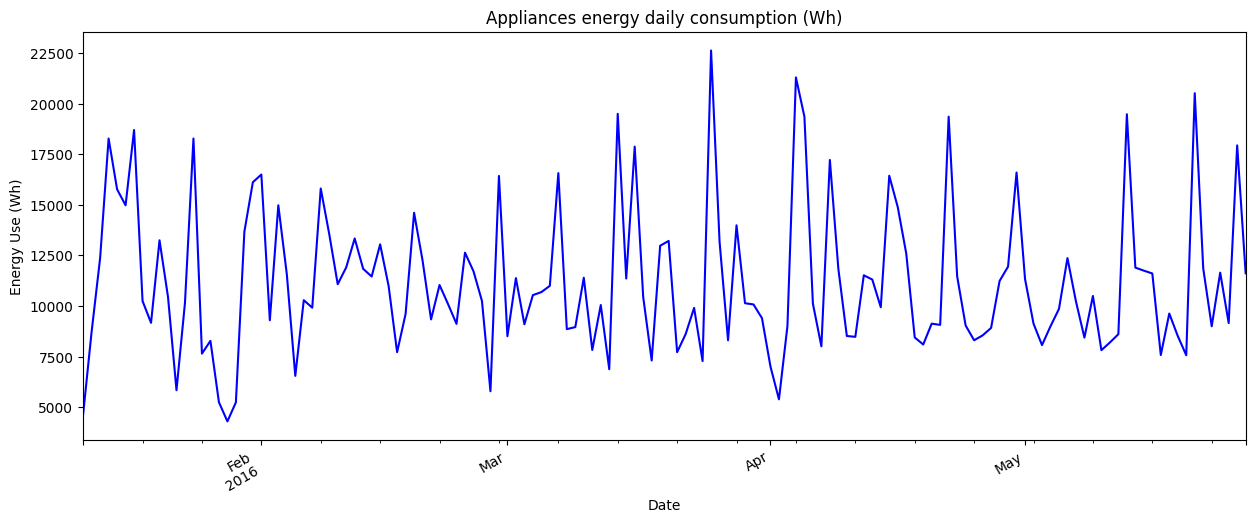

In [42]:
plt.figure(figsize=(15, 6))
daily_energy_use = Appliances.resample('D').sum()

daily_energy_use['Appliances'].plot(label='Appliances', color='blue')

plt.gcf().autofmt_xdate()  # Auto format the dates for better readability
plt.title('Appliances energy daily consumption (Wh)')
plt.xlabel('Date')
plt.ylabel('Energy Use (Wh)')
plt.show()


##### 2.4 Visualization of Daily Energy Consumption Distribution by Appliances

Graphs Description:
- The histogram represents the daily energy consumption distribution of appliances.
- The majority of the daily energy consumption values are clustered between 7,500 and 12,500 Wh.


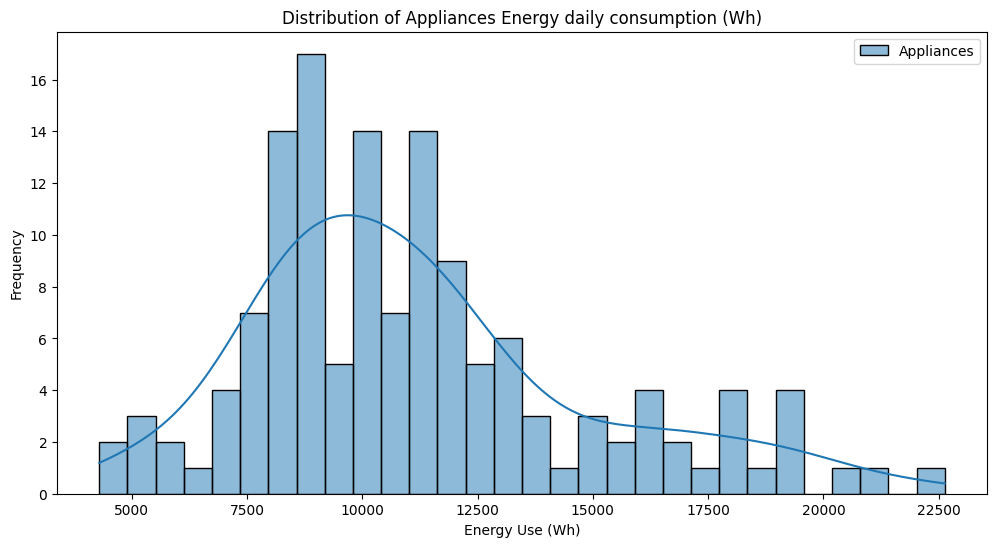

In [31]:
# Distribution of energy use by appliances
plt.figure(figsize=(12, 6))
sns.histplot(daily_energy_use, bins=30, kde=True)
plt.title('Distribution of Appliances Energy daily consumption (Wh)')
plt.xlabel('Energy Use (Wh)')
plt.ylabel('Frequency')
plt.show()

##### 2.5 Visualization of weather measure by Chièvres weather station

Graphs Description:

**Uptrend measuerment**:
- Temperature: As the temperature rises, the energy usage of cooling systems, like air conditioners, typically increases.
- Pressure: Atmospheric pressure can affect the efficiency of combustion-based heating systems and refrigeration cycles. 
- Tdewpoint: A higher dew point indicates higher moisture content in the air, air conditioners consume more energy to condense this excess moisture out of the air, that might increased energy consumption.

**Downtrend measuerment**:
- Humidity: If the humidity drops too low, it can cause discomfort, and occupants might use humidifiers, which also consume energy, to maintain comfort levels.
- Windspeed: Higher winds can increase the rate of heat loss from a building due to infiltration or natural ventilation. 

**Swing between a range**:
- Visibility: Visibility itself might not directly affect energy consumption. 



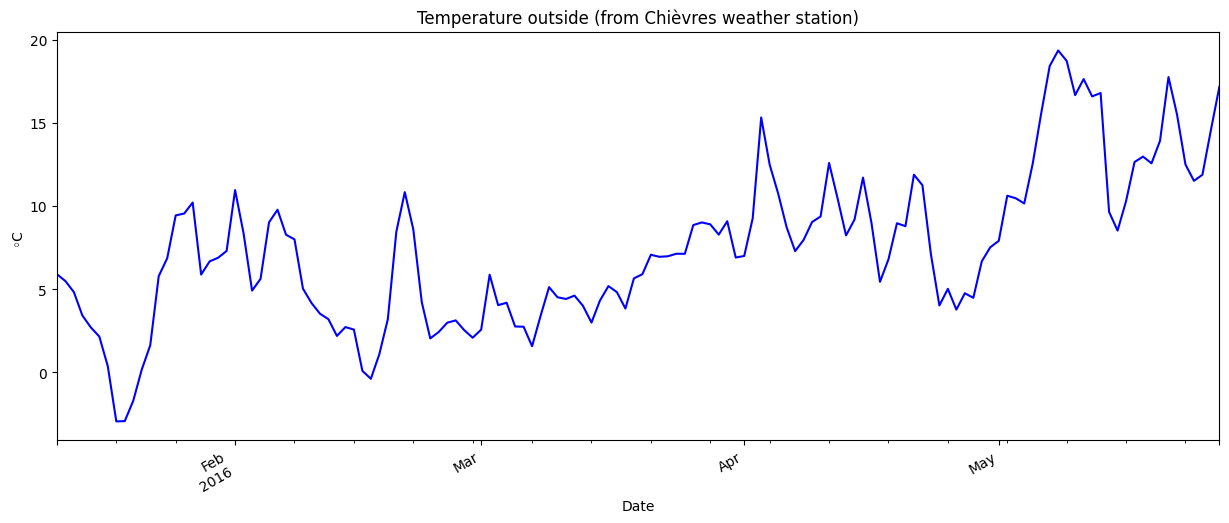

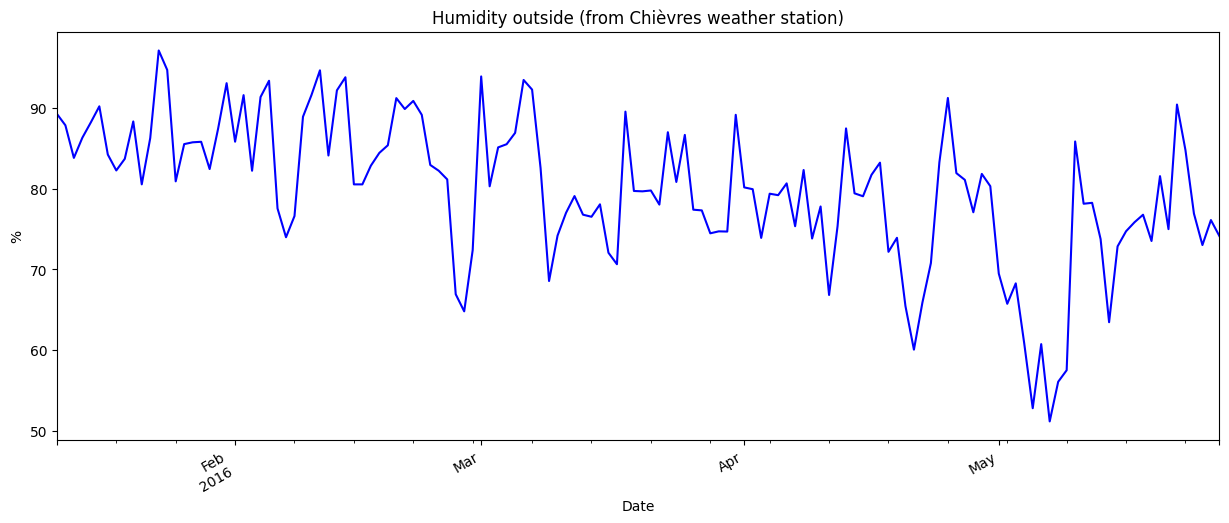

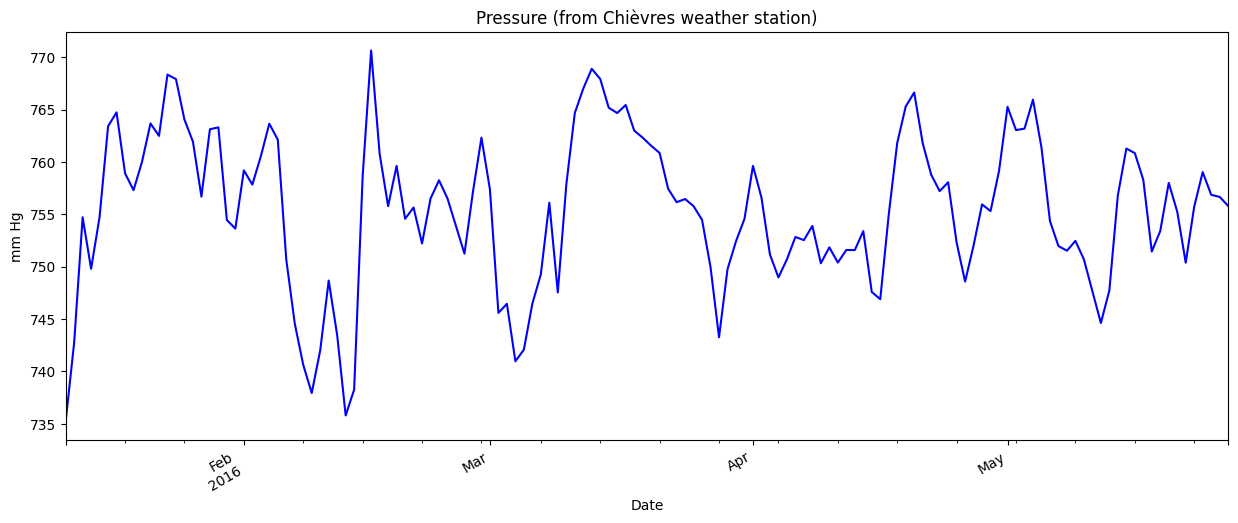

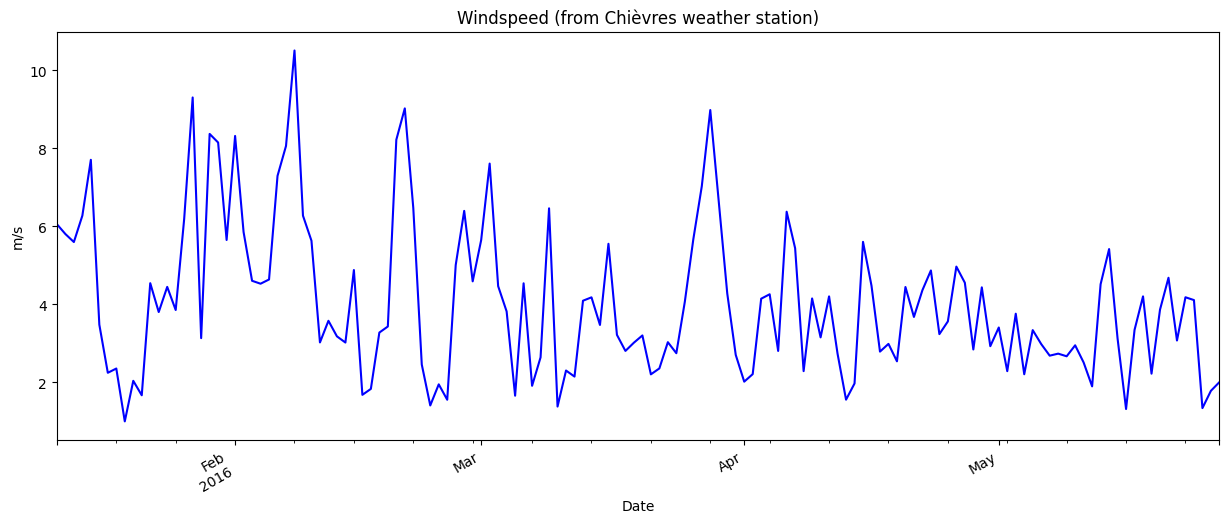

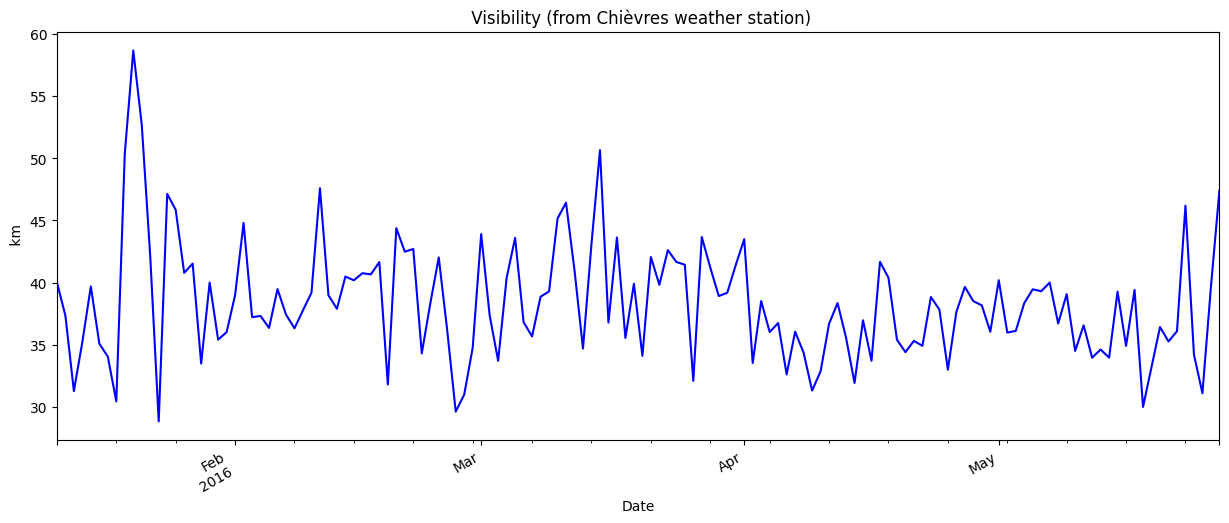

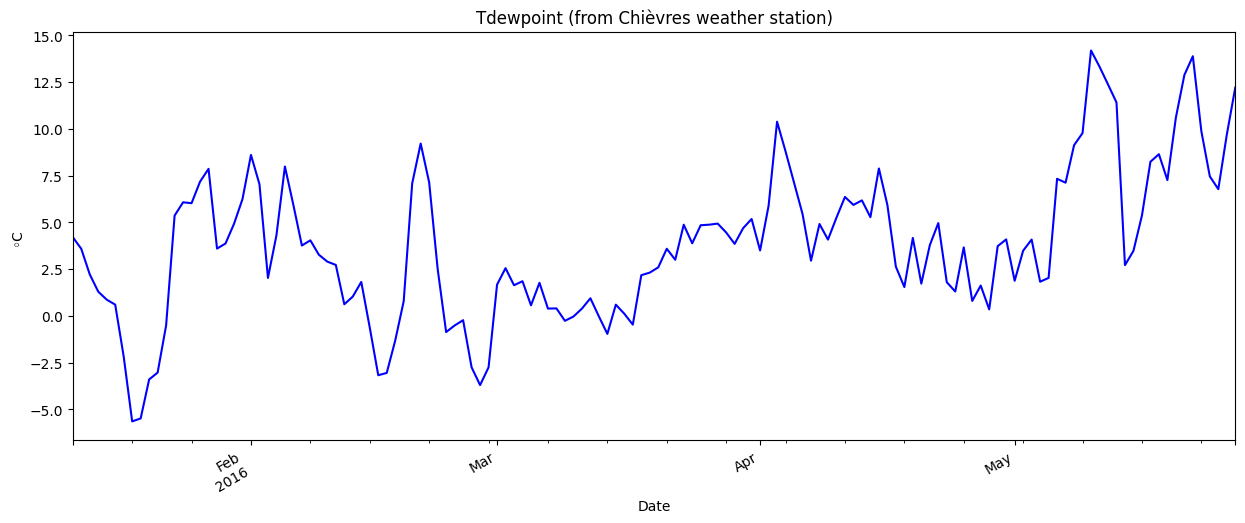

In [32]:
daily_weather = X_train[['T_out', 'RH_out','Press_mm_hg','Windspeed','Visibility','Tdewpoint']].resample('D').mean()

tag_name = {'T_out':"Temperature outside",'RH_out':"Humidity outside",'Press_mm_hg':"Pressure",'Windspeed':"Windspeed",'Visibility':" Visibility",'Tdewpoint':"Tdewpoint"}
tag_unit = {'T_out':"◦C",'RH_out':"%",'Press_mm_hg':"mm Hg",'Windspeed':"m/s",'Visibility':" km",'Tdewpoint':"◦C"}

for i in daily_weather.columns:
    plt.figure(figsize=(15, 6))
    daily_weather[i].plot(label=i, color='blue')
    # plt.plot(date,Appliances)
    plt.gcf().autofmt_xdate()  # Auto format the dates for better readability
    plt.title(f'{tag_name[i]} (from Chièvres weather station)')
    plt.xlabel('Date')
    plt.ylabel(tag_unit[i])
    plt.show()

##### 2.6 Visualization of Temperature and Humidity Sensor Readings

- Filtered columns from `X_train` data to include only temperature and humidity sensor readings, excluding external temperature (`T_out`, `Tdewpoint`) and external humidity (`RH_out`).

- Extracted data for each sensor into `temperature_data` and `humidity_data` for analysis.

- Generated boxplots for temperature and humidity data using `plt.boxplot()`, providing a visual representation of the distribution of sensor readings.
  
Graphs Description:
- The first quartile (Q1), third quartile (Q3), and median of the `T6` and `RH_6` columns are notably different from other sensor readings. This discrepancy could indicate that these sensors are placed outside the building, thus reflecting the external temperature and humidity conditions, which are typically more variable than indoors.

- The `RH_5` sensor displays a significant number of outliers, which may suggest that it is located in a bathroom where humidity levels can spike dramatically during activities like showering.

Impact for Preprocessing:
- Due to the high number of outliers in the `RH_5` readings, these outliers will be replaced by the median value of the `RH_5` data during the preprocessing step to normalize the data and mitigate the influence of extreme values.


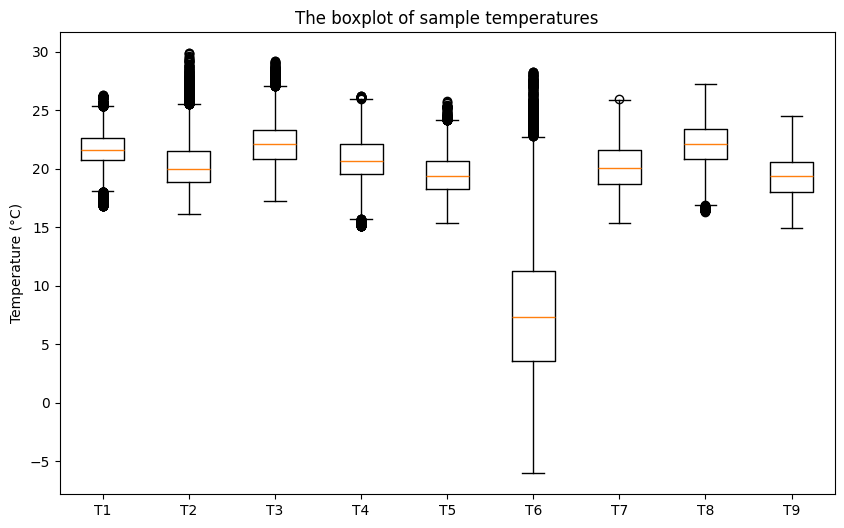

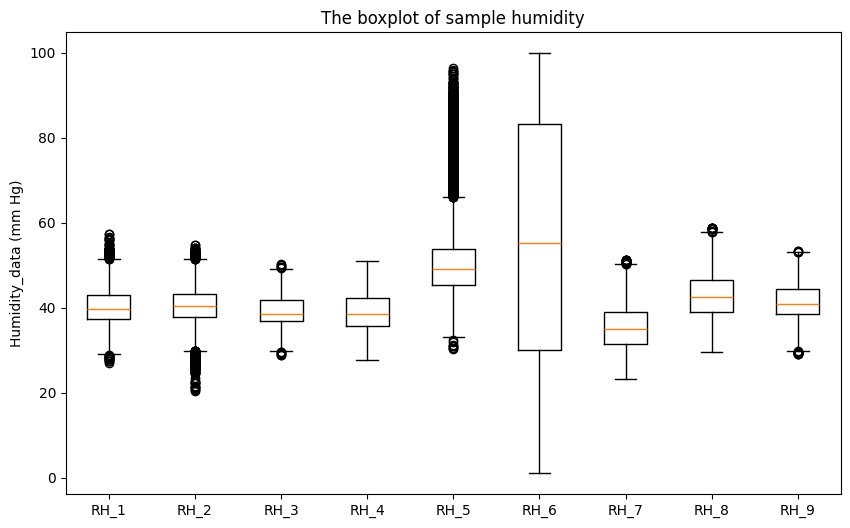

In [33]:
temperature_columns = [col for col in X_train.columns if col.startswith('T') and col not in ['T_out', 'Tdewpoint']]
temperature_data = [X_train[i] for i in temperature_columns]
# Create a figure and an axis
plt.figure(figsize=(10, 6))
plt.boxplot(temperature_data)
plt.xticks([1 + i for i in range(len(temperature_columns))], temperature_columns)
plt.title('The boxplot of sample temperatures')
plt.ylabel('Temperature (°C)')
plt.show()

humidity_columns = [col for col in X_train.columns if col.startswith('RH') and col not in ['RH_out']]
humidity_data = [X_train[i] for i in humidity_columns]
# Create a figure and an axis
plt.figure(figsize=(10, 6))
plt.boxplot(humidity_data)
plt.xticks([1 + i for i in range(len(humidity_columns))], humidity_columns)
plt.title('The boxplot of sample humidity')
plt.ylabel('Humidity_data (mm Hg)')
plt.show()


##### 2.7 Correlation Analysis between Features and Appliance Energy Usage
- Implemented L1 regularization using the Lasso model for feature selection to identify the most significant predictors of appliance energy consumption.

- Normalized the feature data using `StandardScaler()` to ensure that each feature contributes equally to the model, preventing bias due to the scale of the measurements.

- Trained a `Lasso` regression model with a regularization strength of alpha set to 0.1 to uncover the correlation between features and the target variable (appliance energy usage).

- Organized the resulting coefficients in a DataFrame, sorted them in ascending order of absolute value, and rounded the coefficients to four decimal places for precise interpretation.
  
Graphs Description:
- Features "rv2", "Tdewpoint", and "rv1" are found to have a coefficient of zero, indicating no correlation with appliance energy usage within the Lasso model framework.
  
Impact for Preprocessing:
- The low corelation features will be excluded from further analysis in both the training and testing datasets, as their lack of correlation suggests they do not contribute predictive value to the model's performance.



In [34]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

lasso = Lasso(alpha=0.1)

# Fit the Lasso model
lasso.fit(X_train_scaled, y_train)

# The Lasso model's coefficients
coefficients = lasso.coef_

pd.DataFrame({'Feature': X.columns, 'Coefficient': abs(coefficients)}).sort_values(by="Coefficient").round({'Coefficient': 4})


,Feature,Coefficient
26,rv2,0.0000
24,Tdewpoint,0.0000
25,rv1,0.0000
8,RH_4,0.2716
21,RH_out,0.8174
20,Press_mm_hg,0.8567
1,T1,1.1206
23,Visibility,1.7128
10,RH_5,1.8379
13,T7,1.8513


##### 2.8 Analysis of Energy Usage by Appliances Across Different Days of the Week, Weekend and Hour of the Day

- Appended a new column `date_of_week` to the `Appliances` DataFrame, representing the day of the week for each entry, derived from the `y_train` index.

- Aggregated the average energy usage of appliances by day of the week and stored the results in `avg_energy_per_date`.

- Utilized `matplotlib` to construct a bar graph displaying the average energy usage for each day of the week.

Graphs Description:  
- The bar graph illustrates that energy consumption by appliances on Tuesday, Wednesday, and Thursday is notably lower compared to other days of the week.


Impact for Preprocessing:
- The day of the week appears to be a feature for predicting energy usage, as the data exhibits variance across different days. 


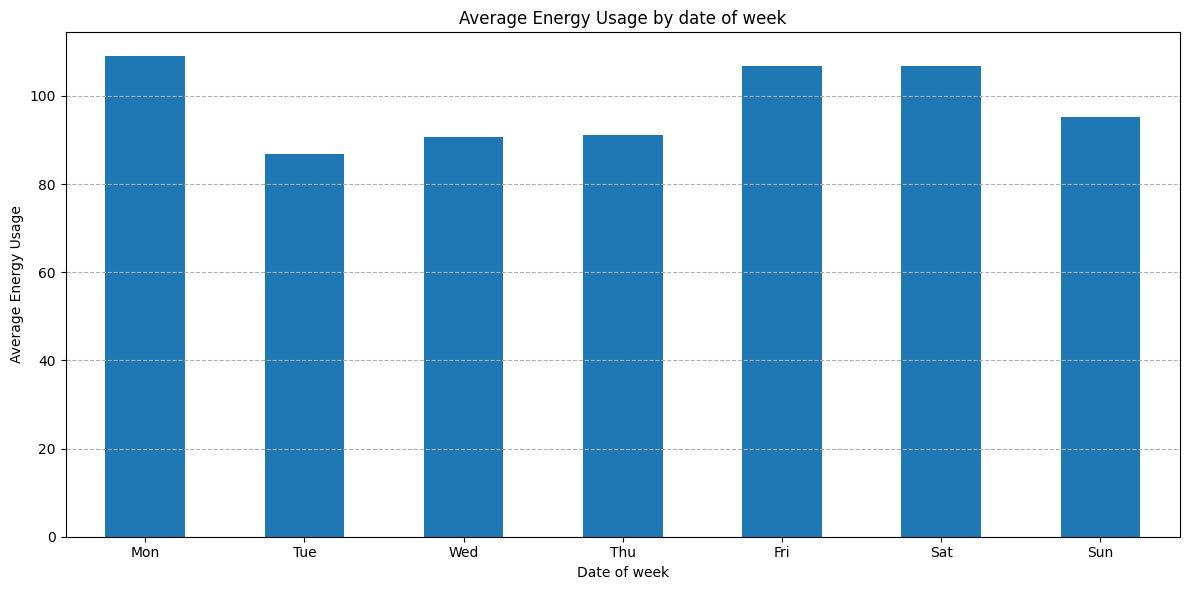

In [35]:
Appliances['date_of_week'] = y_train.index.day_of_week


# Group by the hour_of_day column and sum up the energy usage
avg_energy_per_date = Appliances.groupby('date_of_week')['Appliances'].mean()


# Visualize the data
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
plt.figure(figsize=(12, 6))
avg_energy_per_date.plot(kind='bar')
plt.title('Average Energy Usage by date of week')
plt.xlabel('Date of week')
plt.ylabel('Average Energy Usage')
plt.xticks(range(len(day_names)), day_names, rotation=0) 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



- Augmented the `Appliances` DataFrame with a new column named `weekend`, which categorizes each entry as a weekday (`0`) or a weekend (`1`) based on the `date_of_week` value.
  
- Calculated the averge energy consumption of appliances for weekdays and weekends and saved this aggregated data as `avg_energy_per_weekend`.

- Deployed `matplotlib` to create a bar chart that visualizes the aggregated energy usage, distinguishing between weekdays and weekends.

Graphs Description:  
- The visualization indicates that energy usage by appliances is higher on weekends compared to weekdays.

Impact for Preprocessing:
- The binary distinction between weekdays and weekends could serve as an influential feature in predicting energy usage patterns.


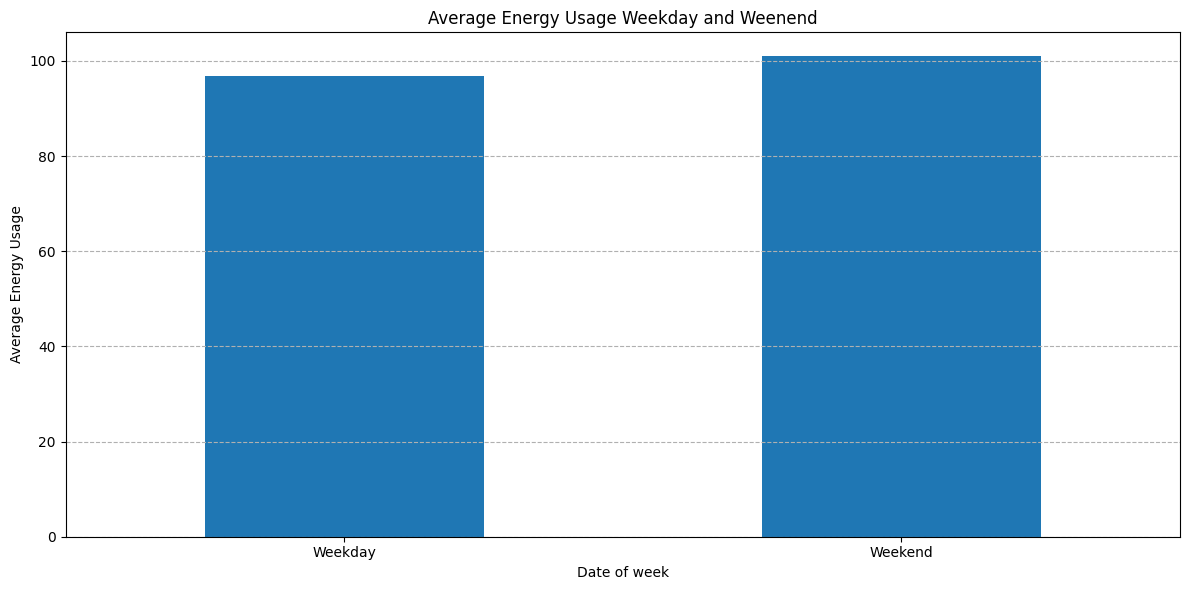

In [36]:
Appliances['weekend'] = [1 if i > 4 else 0 for i in Appliances['date_of_week']]

avg_energy_per_weekend = Appliances.groupby('weekend')['Appliances'].mean()

weekday_names = ["Weekday", "Weekend"]
plt.figure(figsize=(12, 6))
avg_energy_per_weekend.plot(kind='bar')
plt.title('Average Energy Usage Weekday and Weenend')
plt.xlabel('Date of week')
plt.ylabel('Average Energy Usage')
plt.xticks(range(len(weekday_names)), weekday_names, rotation=0) 
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

- Adds a new column `hour_of_day` to the `Appliances` DataFrame, capturing the hour from the `y_train` index, to represent when energy usage was recorded.

- Compiled the average energy consumption by appliances for each hour into `avg_energy_per_hour`.

- Utilizes `sns.heatmap` from the seaborn library to create a heatmap that displays average energy usage across various hours of the day vertically.

- Configures the heatmap for vertical display, with `cmap="YlGnBu"` to use a blue-green color map, and annotations to show precise values of average energy usage.
  
Graph Description:
- The chart reveals that the peak energy usage by appliances occurs between 17:00 and 19:00, indicating a higher demand during these evening hours.
- The peak is on 18:00 about using 191.1 (Wh)

Impact for Preprocessing:
- Hourly energy usage patterns are crucial for predicting overall energy consumption, as there is a clear variation in usage throughout the day. 


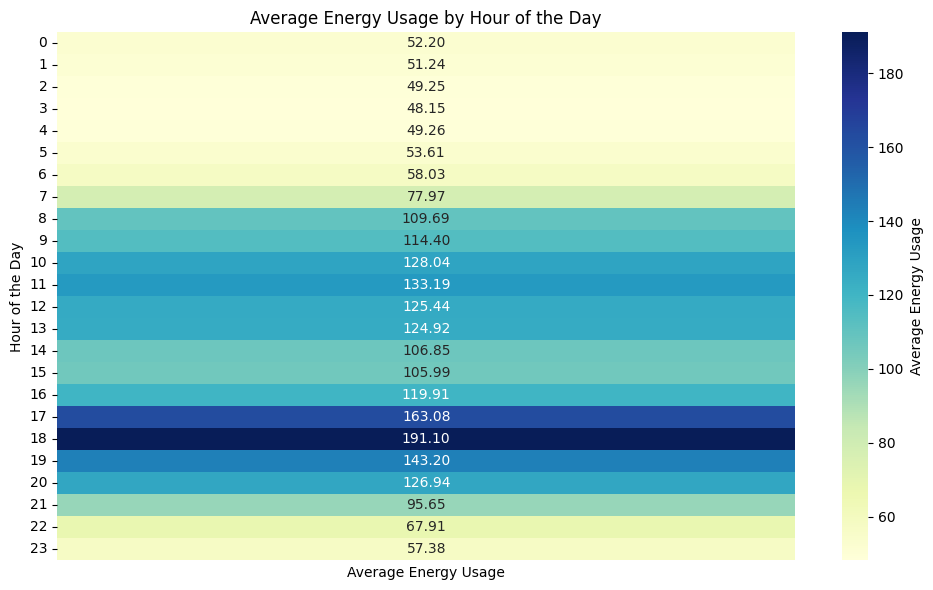

In [37]:
Appliances['hour_of_day'] = y_train.index.hour

# Group by the hour_of_day column and sum up the energy usage
avg_energy_per_hour = Appliances.groupby('hour_of_day')['Appliances'].mean()

data_for_heatmap = avg_energy_per_hour.values.reshape(-1, 1)  # Keep it vertical

# Visualize the data
plt.figure(figsize=(10, 6))  # Adjust for vertical display
sns.heatmap(data_for_heatmap, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Average Energy Usage'}, yticklabels=avg_energy_per_hour.index)
plt.title('Average Energy Usage by Hour of the Day')
plt.xlabel('Average Energy Usage')
plt.ylabel('Hour of the Day')
# Adjust the y-tick labels to show hours
plt.yticks(np.arange(0.5, len(avg_energy_per_hour.index), 1), avg_energy_per_hour.index, rotation=0)
plt.xticks([])
plt.tight_layout()
plt.show()

##### 2.9 Visualization of the Feature Correlation Matrix

- Merged the target variable `y_train` with feature set `X_train` into a single DataFrame `merged_train` for correlation analysis.

- Generated a correlation matrix heatmap using Seaborn to visualize the relationships between all features, including the target variable.

- Configured the heatmap to display correlation coefficients with two decimal points for precise interpretation.

Graph Description:
- Observations reveal that the columns ranging from `T1` to `Tdewpoint` exhibit relatively high correlation with each other, indicating a strong interrelationship among these temperature-related features.

Impact for Preprocessing:
- Despite `Tdewpoint` showing zero correlation with the `Appliance` energy usage directly, it will be retained in the feature set because of its significant correlation with other sensor readings, which may contribute to the predictive model indirectly.

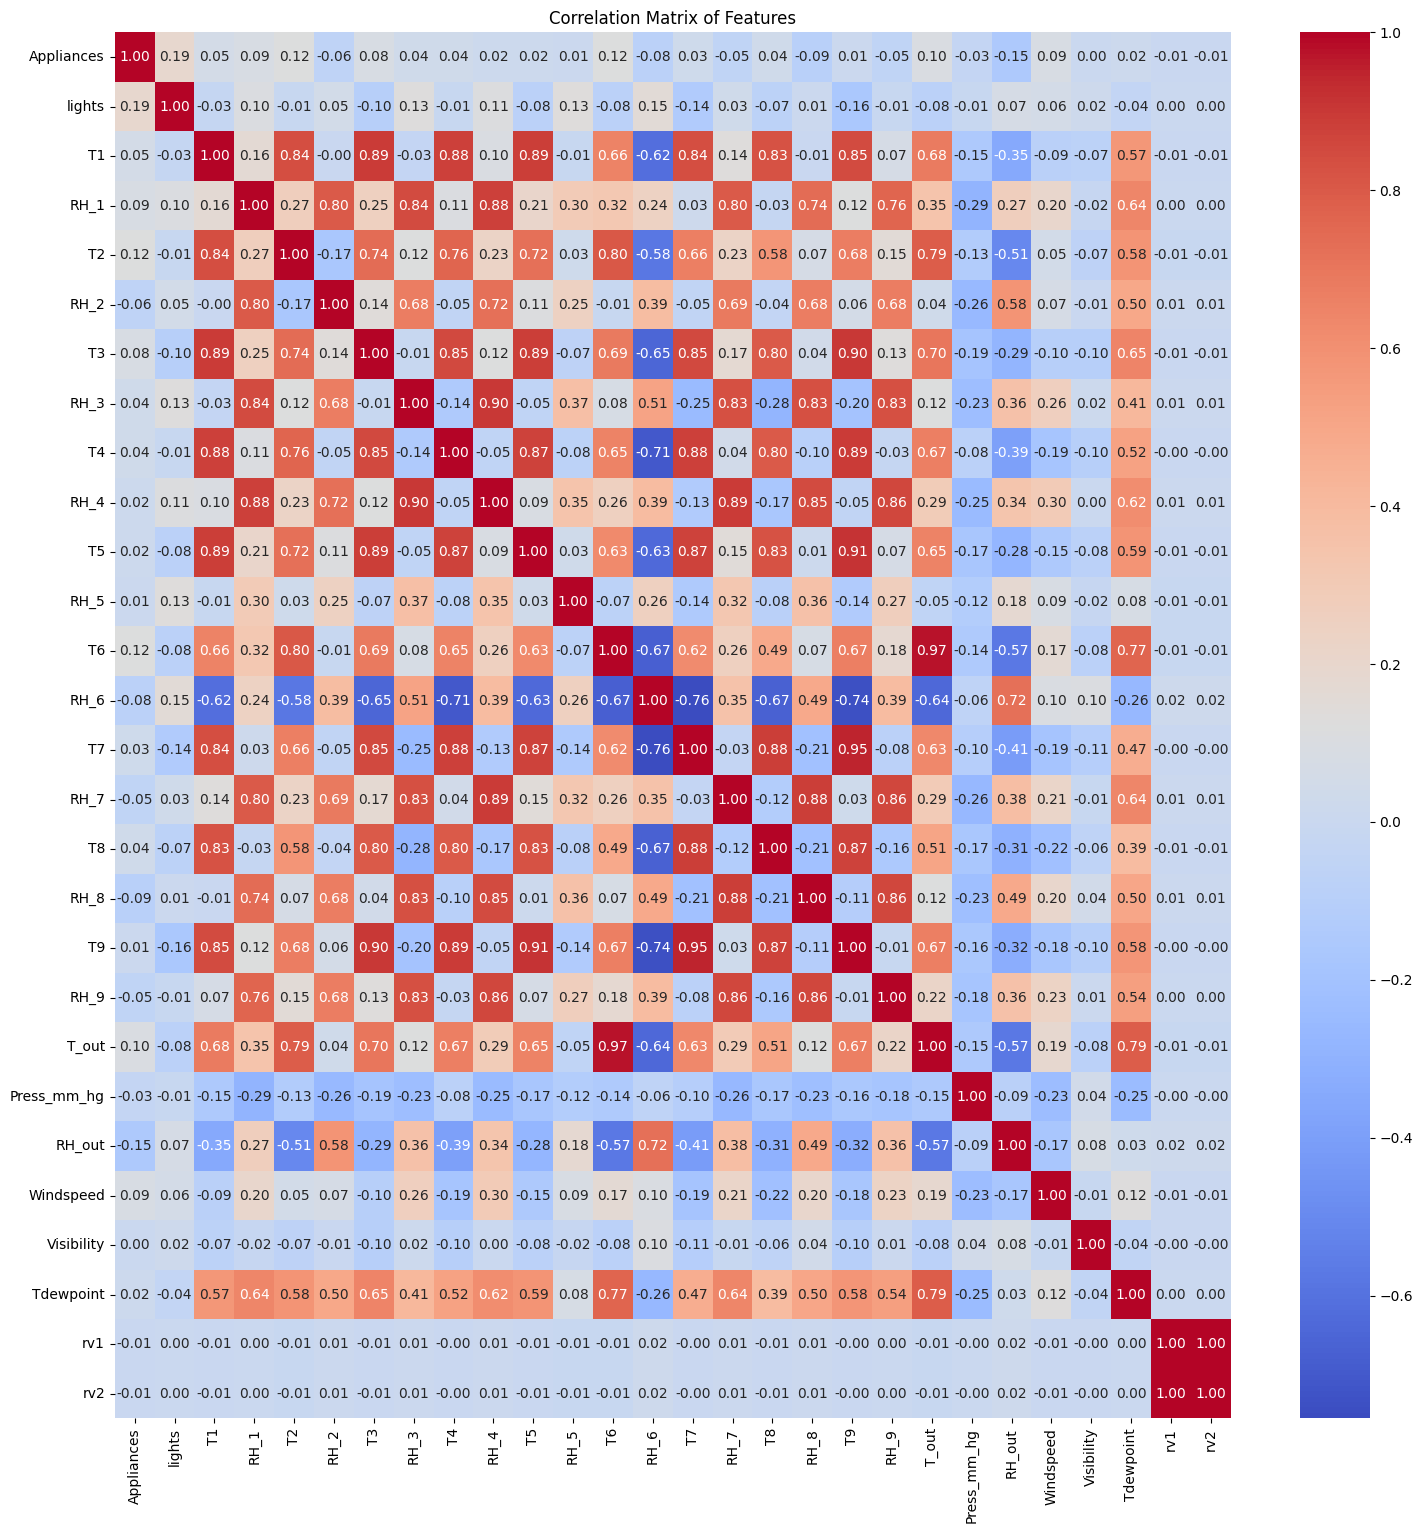

In [38]:
# Correlation matrix heatmap

merged_train = pd.DataFrame(y_train).join(X_train)

plt.figure(figsize=(18, 18))
correlation_matrix = merged_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

##### 2.10 Conclusion of the impact for preprocessing
- Outliers in `RH_5` will be replaced with its median to normalize data for modeling.
- Features with low correlation to the target will be removed to improve model relevance.
- Day of the week, distinction between weekdays and weekends, and hourly patterns are considered predictive features due to their variation in energy usage.
- `Tdewpoint` will be kept despite low direct correlation with energy usage because of its significant association with other important features.

### 3. Pre-process the data


In [14]:
from sklearn.preprocessing import StandardScaler

##### 3.1 Assessment of Missing Values in Datasets
- Employed `isnull()` combined with `sum()` functions to quantify missing values across all datasets.

- Systematically checked each dataset (`X_train`, `X_test`, `y_train`, `y_test`) for null entries.

**Result Summary**

| Dataset  | Missing Values |
|----------|----------------|
| X_train  | 0              |
| X_test   | 0              |
| y_train  | 0              |
| y_test   | 0              |

- Confirmed the absence of missing values in all datasets, indicating data integrity and readiness for further analysis or model training.


In [15]:
missing_values_of_X_train = X_train.isnull().sum().sum()
missing_values_of_X_test = X_test.isnull().sum().sum()
missing_values_of_y_train = y_train.isnull().sum()
missing_values_of_y_test = y_test.isnull().sum()

print("Missing values in X_train:", missing_values_of_X_train)
print("Missing values in X_test:", missing_values_of_X_test)
print("Missing values in y_train:", missing_values_of_y_train)
print("Missing values in y_test:", missing_values_of_y_test)

Missing values in X_train: 0
Missing values in X_test: 0
Missing values in y_train: 0
Missing values in y_test: 0


##### 3.2 Data Preprocessing Function Overview

Defined a `preprocessing` function to streamline data preparation:

**Column Removal:**
- Columns "rv1" and "rv2" are removed to eliminate features not contributing to predictive performance.

**Feature Engineering:**
- Introduced `total_second_of_the_day` to quantify the time within a day in seconds, enhancing the model's ability to interpret daily time patterns.
- Generated `day_of_week` as a numerical representation of weekdays, aiding in the analysis of weekly patterns, and further encodes this into one-hot encoded columns to distinguish between different days of the week by using pd.get_dummies().
- Using for loop to convert bool output to `0` or `1`
- Created a `weekend` binary indicator, where Monday to Friday is labeled `0` and Saturday to Sunday is `1`, to differentiate between weekday and weekend energy usage patterns.

**Outlier Handling:**
- Outliers in the "RH_5" column are replaced with the column's median value to mitigate the impact of extreme deviations on the model.

Finally apply the `preprocessing` function to X taing and X test and named as `X_train_processed` and `X_test_processed`

In [15]:
def preprocessing(X):
    # Remove "rv1" and "rv2" column
    X = X.drop(['rv1', 'rv2'], axis=1)

    # Adding features
    X["total_second_of_the_day"] = (X.index - X.index.normalize()).total_seconds()
    X['day_of_week'] = X.index.dayofweek
    X = pd.get_dummies(X, columns=['day_of_week'])
    for i in range(7):
        name = f"day_of_week_{i}"
        X[name] = X[name].astype(int)
    X['weekend'] = X.index.weekday.map(lambda x: 0 if x < 5 else 1)
    
    # Replace outliers by its median
    Q1 = X["RH_5"].quantile(0.25)
    Q3 = X["RH_5"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = X["RH_5"].median()
    X.loc[X["RH_5"] < lower_bound, "RH_5"] = median_value
    X.loc[X["RH_5"] > upper_bound, "RH_5"] = median_value
    return X

In [16]:
X_train_processed = preprocessing(X_train)
X_test_processed = preprocessing(X_test)

##### 3.3 Application of Standard Scaler for X taing and X test

- Identifies features to scale (`scale`) as those not starting with "day_" and not equal to "weekend".
- Selects one-hot encoded and binary features (`numeric`) as those starting with "day_" or equal to "weekend".
- Utilizes `StandardScaler` for normalization, aiming to scale only selected features for consistency in magnitude across the dataset.
- Applies `StandardScaler` only to the specified `scale` features in `X_train`, using `fit_transform` to adjust the scaler based on the training data and apply the scaling.
- Converts the scaled training data back to a DataFrame with appropriate columns and index.
- Merges the scaled features with the unscaled `numeric` features using `pd.concat`, preserving the full feature set in `X_train`.

- Scales `X_test` using the already fitted `scaler` (with `transform`), ensuring the test data is scaled using the same parameters as the training data.
- Converts the scaled test data back to a DataFrame and merges it with the unscaled `numeric` features, similar to the training data process.



In [17]:
scale = [i for i in X_train_processed.columns if not i.startswith("day_") and i != "weekend"]
numeric = [i for i in X_train_processed.columns if i.startswith("day_") or i== "weekend"]

scaler = StandardScaler()

# Only apply on numeric
X_train_scaler = scaler.fit_transform(X_train_processed[scale])
X_train_scaler = pd.DataFrame(X_train_scaler, columns=scale,index=X_train.index)
X_train = pd.concat([X_train_scaler, X_train_processed[numeric]], axis=1)

X_test_scaler = scaler.transform(X_test_processed[scale])
X_test_scaler = pd.DataFrame(X_test_scaler, columns=scale,index=X_test.index)
X_test = pd.concat([X_test_scaler, X_test_processed[numeric]], axis=1)

### 4. Implement, train and test prediction models

##### 4.1 Model Training and Evaluation with Linear Regression (Baseline model)

- Since the task involves predicting a continuous outcome variable based on one or more predictor variables that is a typical  regression problem. So Linear Regression model will be use as the baseline model to predict target.

- Employed various metrics for model evaluation:
    - **MAE (Mean Absolute Error):** Measures the average magnitude of errors in a set of predictions, without considering their direction.
    - **MSE (Mean Squared Error):** Calculates the average of the squares of the errors, heavily penalizing larger errors.
    - **RMSE (Root Mean Squared Error):** The square root of MSE, providing error in the same units as the target variable.
    - **R^2 (Coefficient of Determination):** Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables, with a score closer to 1 indicating a better fit.


**Result of Linear Regression**

| Metric | Linear Regression|
|--------|---------------------|
| MAE    | 52.66714929851786             |
| MSE    | 8219.83714219628           |
| RMSE   | 90.66331751152877            |
| R^2    | 0.17859874913366303               |

**Discussion**
- The performance of the Linear Regression model has plenty of space to improve.
- The RMSE value suggests that the model's predictions, on average, deviate from the actual values by approximately 90.66 units. This indicates a substantial error magnitude, implying that the model may not be very accurate in its predictions.
- The R^2 score reveals that the model explains only about 17.86% of the variance in the target variable based on the input features. This relatively low value suggests that the model's predictive power is limited, and it may not capture the underlying relationship between the input features and the target variable effectively.

In [22]:
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train) 
predictions = model.predict(X_test)

print(f"Linear Regression")
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions), "\n")

Linear Regression
MAE: 52.66714929851786
MSE: 8219.83714219628
RMSE: 90.66331751152877
R^2: 0.17859874913366303 



##### 4.2 10-fold cross-validation to find better model

- 'Random Forest Regressor', 'SVR' and 'Gradient Boosting Regressor' was used since it mentioned in the paper (Candanedo, Feldheim & Deramaix 2017)
- 10-fold cross-validation was applied the these three model to evlaue which one better
- The parameter of `RandomForestRegressor` was reference by the paper was set it as n_estimators=300, max_features=18 (Candanedo, Feldheim & Deramaix 2017)
- The parameter of `GradientBoostingRegressor` was reference by the paper was set it as n_estimators=10900, max_depth=5 (Candanedo, Feldheim & Deramaix 2017)





In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

def cross_validation(model, X, y):
    # Define the K-fold cross-validator (k=10)
    kf = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)
    mse_scores = -scores
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

    # print("RMSE scores for each fold:", rmse_scores)
    print("Average RMSE:", np.mean(rmse_scores))
    print("Average R^2:", np.mean(r2_scores))


models = {
    'Random Forest Regressor': RandomForestRegressor(n_estimators=300, max_features=18, random_state=42, n_jobs=-1),
    'SVR' : SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42)
}

for i in models.keys():
    print(i)
    cross_validation(models[i], X_train, y_train)


Random Forest Regressor
Average RMSE: 68.17135815208823
Average R^2: 0.5620058647782242
SVR
Average RMSE: 101.55221795525185
Average R^2: 0.02914670405233839
Gradient Boosting Regressor
Average RMSE: 67.49117848607162
Average R^2: 0.5614770124981908


### 5. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

##### 5.1 Model Performance Results

|                       | Random Forest Regressor | SVR                   | Gradient Boosting Regressor |
|-----------------------|-------------------------|-----------------------|-----------------------------|
| **Average RMSE**      | 68.17135815208823       | 101.55221795525185    | 67.49117848607162          |
| **Average R^2**       | 0.5620058647782242      | 0.02914670405233839  | 0.5614770124981908          |

- **Random Forest Regressor:** shows a good performance with an Average RMSE of 68.17 and an Average R^2 of 0.562. 

- **SVR:** on the other hand, has a much higher Average RMSE of 101.55, indicating less accuracy in predictions compared to the other models. Its Average R^2 is notably low at 0.029, which means it explains a very small fraction of the variance in the target variable, making it the least effective model among the three in this context.

- **Gradient Boosting Regressor:** exhibits the best performance in terms of RMSE with a value of 67.49, slightly better than the Random Forest Regressor. Its Average R^2 of 0.561 is comparable to that of the Random Forest, indicating a similarly good fit to the data.





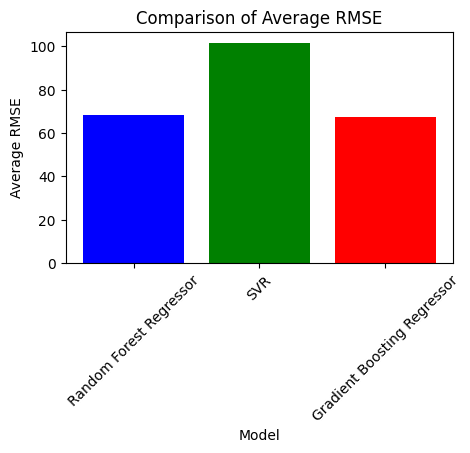

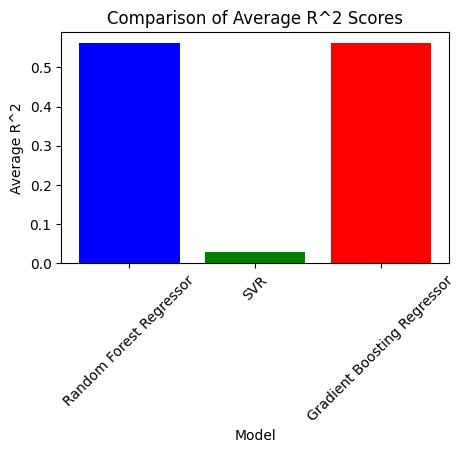

In [25]:
model_name = ["Random Forest Regressor", "SVR", "Gradient Boosting Regressor"]
Avg_RMSE = [ 68.17135815208823, 101.55221795525185, 67.49117848607162]
Avg_R2 = [0.5620058647782242, 0.02914670405233839, 0.5614770124981908]

plt.figure(figsize=(5, 3))
plt.bar(model_name, Avg_RMSE, color=['blue', 'green', 'red'])
plt.title('Comparison of Average RMSE')
plt.xlabel('Model')
plt.ylabel('Average RMSE')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(5, 3))
plt.bar(model_name, Avg_R2, color=['blue', 'green', 'red'])
plt.title('Comparison of Average R^2 Scores')
plt.xlabel('Model')
plt.ylabel('Average R^2')
plt.xticks(rotation=45)
plt.show()

##### 5.2 Optimal Model Selection

**Gradient Boosting Regressor** has a better performents:

- **Lower RMSE**: The Gradient Boosting Regressor has the lowest average RMSE of 67.4912, indicating that, on average, its predictions are closest to the actual values. A lower RMSE value signifies better predictive accuracy.

- **Fair R^2 Score**: Although the Random Forest Regressor has a slightly higher R^2 score of 0.562 compared to the Gradient Boosting Regressor's 0.561, the difference is marginal. 

Considering both RMSE and R^2 together, the Gradient Boosting Regressor offers a slightly better balance of predictive accuracy and model fit to the data than the Random Forest Regressor, despite the very close R^2 scores. 


##### 5.3 Comparison with Baseline Model

| Metric | Linear Regression  | Gradient Boosting Regressor |
|--------|--------------------|-----------------------------|
| MAE    | 52.66714929851786  | 31.486824582585633           |
| MSE    | 8219.83714219628 | 4012.970118679638        |
| RMSE   | 90.66331751152877| **63.34800800877355**        |
| R^2    | 0.17859874913366303|**0.5989873499741929**        |


##### 5.4 Discussion

- Gradient Boosting Regressor outperforms the baseline (Linear Regression) in predicting appliance energy usage.
- A significant reduction in RMSE (from 90.66 to 63.35) and an increase in R^2 score (from 0.179 to 0.599).
- Gradient Boosting can handle complex non-linear relationships between features and the target variable. 
- It is automatically captures interactions between features through its tree-based structure, which can be crucial for accurate predictions.

In [23]:
final_model = GradientBoostingRegressor(n_estimators=10900, max_depth=5, random_state=42)
final_model.fit(X_train,y_train)
predictions = final_model.predict(X_test)

print("Gradient Boosting Regressor")
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('R^2:', r2_score(y_test, predictions), "\n")

Gradient Boosting Regressor
MAE: 31.486824582585633
MSE: 4012.970118679638
RMSE: 63.34800800877355
R^2: 0.5989873499741929 



### 6. Reflect on what you have learned by completing this assignment and how to improve the models

##### 6.1 Reflection of learning 

- **Deeper Understanding of Regression Problems**: The experience has led to a more profound comprehension of how to approach regression challenges, including selecting appropriate models and applying them effectively to predict continuous outcomes.

- **Enhanced Problem-Solving Skills**: Throughout the process, there was significant growth in the ability to identify and correct issues, whether they were data-related, model-specific, or part of the computational implementation.

- **Broadened Model Awareness**: Exposure to a variety of regression models has enriched understanding of their unique advantages and limitations, fostering a more nuanced evaluation of which model to employ based on the problem at hand.

##### 6.2 Reflection of improvement  
- **Experiment with Different Models:** The journey ahead includes venturing into more varied modeling techniques. This means not only refining skills with ensemble methods like Random Forests and Gradient Boosting but also considering alternative approaches that might yield superior results for particular datasets.
- **Regularization Techniques:** To enhance model generalization and mitigate overfitting, there's a need to deepen the application of regularization techniques. Learning to fine-tune regularization parameters will be key in developing more robust models.
- **Neural Networks:**  Recognizing the potential of neural networks to capture complex patterns in data, especially where traditional regression models struggle, delving into neural network architectures could unlock new levels of predictive accuracy. This exploration will involve understanding network design, activation functions, and optimization strategies to tailor neural models to regression tasks effectively.

### 7. References

Candanedo, L.M., Feldheim, V. & Deramaix, D. 2017, ‘Data driven prediction models of energy use of appliances in a low-energy house’, Energy and Buildings, vol. 140, pp. 81-97